In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import datetime
import seaborn as sns
import pandas as pd
import cProfile
from matplotlib.mlab import PCA
from functions import *
from costs import *
from proj1_helpers import *
from method_comparison_helpers import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
# Load Data
with zipfile.ZipFile("../data/test.csv.zip","r") as zip_ref:
    zip_ref.extractall("../data/")
DATA_TRAIN_PATH = '../data/train.csv' 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)
DATA_TEST_PATH = '../data/test.csv'
y_test, tx_test, ids_test = load_csv_data(DATA_TEST_PATH)
all_y = np.append(y, y_test)
all_tx = np.concatenate((tx, tx_test))

## Exploratory data analysis

In [3]:
# Lets load it into Pandas data frame since it is easier for data analysis
original_df = pd.DataFrame(tx)
columns = original_df.columns.to_series()
sparse_columns = np.array([])
for i, column in columns.iteritems():
    value_counts = original_df[original_df.columns[column]].value_counts()
    if -999 in value_counts:
        sparse_columns = np.append(sparse_columns, [column])
# Lets replace -999 values for nan's
replaced999_df = original_df.replace(-999, np.nan)

In [4]:
# EXPLORATORY DATASET 1
# mean_filled_df - Dataset for which NaN's values were replaced by mean of column
mean_filled_df = replaced999_df.copy()
for i, column in np.ndenumerate(sparse_columns):
    col_mean = mean_filled_df[column].mean()
    mean_filled_df[column] = mean_filled_df[column].fillna(col_mean)
# mean_filled_normalized_df - mean_filled_df where mean value of colum was also subtracted for each element in same column
mean_filled_normalized_df = (mean_filled_df - mean_filled_df.mean())

In [5]:
# EXPLORATORY DATASET 2
# zero_filled_df - Dataset for which NaN's values were replaced by 0
zero_filled_df = replaced999_df.fillna(0)
# zero_filled_normalized_df - zero_filled_df where mean value of colum was also subtracted for each element in same column
zero_filled_normalized_df = (zero_filled_df - zero_filled_df.mean())

In [6]:
# EXPLORATORY DATASET 3
# Lets sum all sprase columns and combine it into new one
combined_df = replaced999_df.copy()
combined_df['combined'] = replaced999_df[sparse_columns].sum(axis=1)
# and drop those nan columns leaving combined
droped_nans_df = combined_df.dropna(axis=1, thresh=250000)
# normalized_df - droped_nans_df where mean value of colum was also subtracted for each element in same column
normalized_df = (droped_nans_df - droped_nans_df.mean())

In [7]:
# Lets do exactly the same but for test dataset
original_test_df = pd.DataFrame(tx_test)
replaced999_test_df = original_test_df.replace(-999, np.nan)
mean_filled_test_df = replaced999_test_df.copy()
for i, column in np.ndenumerate(sparse_columns):
    col_mean = mean_filled_test_df[column].mean()
    mean_filled_test_df[column] = mean_filled_test_df[column].fillna(col_mean)
mean_filled_normalized_test_df = (mean_filled_test_df - mean_filled_test_df.mean())
combined_test_df = replaced999_test_df.copy()
combined_test_df['combined'] = combined_test_df[sparse_columns].sum(axis=1)
droped_nans_test_df = combined_test_df.dropna(axis=1, thresh=568000)
normalized_test_df = (droped_nans_test_df - droped_nans_test_df.mean())# / (droped_nans_test_df.max() - droped_nans_test_df.min())

zero_filled_test_df = replaced999_test_df.fillna(0)
zero_filled_test_normalized_df = (zero_filled_test_df - zero_filled_test_df.mean())

In [8]:
# Lets change it back to numpy array

# train datasets
new_meanfilled_tx = mean_filled_normalized_df.as_matrix() # DATASET 1
new_zerofilled_tx = zero_filled_normalized_df.as_matrix()[:,0:30] # DATASET 2
new_tx = normalized_df.as_matrix() # DATASET 3
train_datasets = [tx, new_meanfilled_tx, new_zerofilled_tx, new_tx]

# test datasets
new_meanfilled_tx_test = mean_filled_normalized_test_df.as_matrix() # DATASET 1
new_zerofilled_tx_test = zero_filled_test_normalized_df.as_matrix()[:,0:30] # DATASET 2
new_tx_test = normalized_test_df.as_matrix() # DATASET 3
test_datasets = [tx_test, new_meanfilled_tx_test, new_zerofilled_tx_test, new_tx_test]

# train and test combined
new_all_meanfilled_tx = np.concatenate((new_meanfilled_tx, new_meanfilled_tx_test)) # DATASET 1
new_all_zerofilled_tx = np.concatenate((new_zerofilled_tx, new_zerofilled_tx_test)) # DATASET 2
new_all_tx = np.concatenate((new_tx, new_tx_test)) # DATASET 3
all_detasets = [all_tx, new_all_meanfilled_tx, new_all_zerofilled_tx, new_all_tx]

datasets_names = ['Original/Raw', 'Mean filled', 'Zero filled', 'NaN dropped']

## Logistic Regression

In [ ]:
#Parameters 
max_iters = 1000
gammas = np.logspace(-14, -18, 10)

In [ ]:
# Logistic Regression of all datasets vs gammas. 
# WARNING Takes a lot of time (~30 min)

for i in range(len(train_datasets)):
    # Parameters
    train_dataset = train_datasets[i]
    test_dataset = test_datasets[i]
    dataset_name = datasets_names[i]
    figure_id = i
    
    logistic_regression_dataset_gammas_test(y, y_test, train_dataset, test_dataset, max_iters, gammas, dataset_name, figure_id)

In [22]:
# Parameters
max_iters = 1000
gamma = 1e-16

Logistic Regression for Original/Raw: execution time=118.495 seconds. Train RMSE Loss=0.9677171625231954 Test RMSE LOSS=1.0895585749857188
Logistic Regression for Mean filled: execution time=12.317 seconds. Train RMSE Loss=0.999941492614085 Test RMSE LOSS=1.00000003431829
Logistic Regression for Zero filled: execution time=12.219 seconds. Train RMSE Loss=0.9998826188607632 Test RMSE LOSS=1.0000001302454118
Logistic Regression for NaN dropped: execution time=9.724 seconds. Train RMSE Loss=0.9998045000966872 Test RMSE LOSS=1.0000003363523664


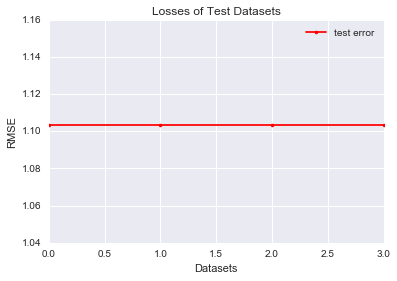

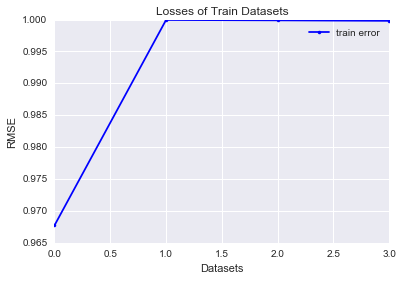

In [35]:
train_losses = []
test_losses = []
for i in range(len(train_datasets)):
    train_dataset = train_datasets[i]
    test_dataset = test_datasets[i]
    dataset_name = datasets_names[i]
    
    train_rmse, test_loss, weight = logistic_regression_dataset_single_gamma_test(y, y_test, train_dataset, test_dataset, max_iters, gamma, dataset_name)
    
    train_losses = np.append(train_losses, train_rmse)
    test_losses = np.append(test_losses, test_rmse)

plt.figure(1)
plt.title("Losses of Test Datasets")
plt.plot(range(len(train_datasets)), test_losses, marker=".", color='r', label='test error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.figure(2)
plt.title("Losses of Train Datasets")
plt.plot(range(len(train_datasets)), train_losses, marker=".", color='b', label='train error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()

## Least Squares

Lest Squares: execution time=0.408 seconds. RMSE Train Loss=0.3396868099082609, Test Loss=1.3948141771602782
Lest Squares: execution time=0.075 seconds. RMSE Train Loss=0.3899161686906373, Test Loss=1.1044778245747984
Lest Squares: execution time=0.076 seconds. RMSE Train Loss=0.38852270379813525, Test Loss=1.1056970655428113
Lest Squares: execution time=0.052 seconds. RMSE Train Loss=0.3910925090125355, Test Loss=1.1033961845905988


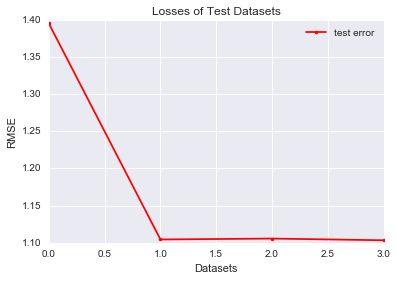

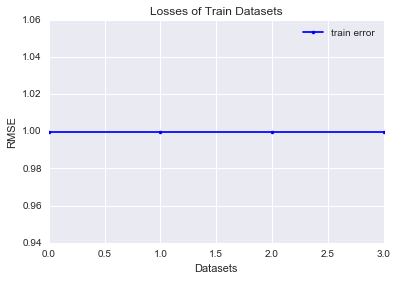

In [36]:
train_losses = []
test_losses = []
for i in range(len(train_datasets)):
    train_dataset = train_datasets[i]
    test_dataset = test_datasets[i]
    dataset_name = datasets_names[i]
    
    start_time = datetime.datetime.now()
    least_squares_loss, least_squares_w = least_squares(y, train_dataset)


    test_mse = compute_loss(y_test, test_dataset, least_squares_w)
    test_rmse = np.sqrt(2*test_mse)
    trains_rmse = compute_rmse_loss(least_squares_loss)
    
    
    train_losses = np.append(train_losses, train_rmse)
    test_losses = np.append(test_losses, test_rmse)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    print("Lest Squares: execution time={t:.3f} seconds. RMSE Train Loss={l}, Test Loss={tl}".format(t=exection_time, l=least_squares_loss, tl=test_rmse))

plt.figure(1)
plt.title("Losses of Test Datasets")
plt.plot(range(len(train_datasets)), test_losses, marker=".", color='r', label='test error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.figure(2)
plt.title("Losses of Train Datasets")
plt.plot(range(len(train_datasets)), train_losses, marker=".", color='b', label='train error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()

## Ridge Regression

Ridge Regression for Original/Raw: execution time=49.100 seconds. Test RMSE Loss=1.00008172054604, Train RMSE Loss=0.9999646414945143
Ridge Regression for Mean filled: execution time=8.759 seconds. Test RMSE Loss=1.0000000000001372, Train RMSE Loss=0.9999998829037504
Ridge Regression for Zero filled: execution time=8.778 seconds. Test RMSE Loss=1.0000000000005214, Train RMSE Loss=0.9999997649292393
Ridge Regression for NaN dropped: execution time=5.780 seconds. Test RMSE Loss=1.0000000000013465, Train RMSE Loss=0.9999996082064058


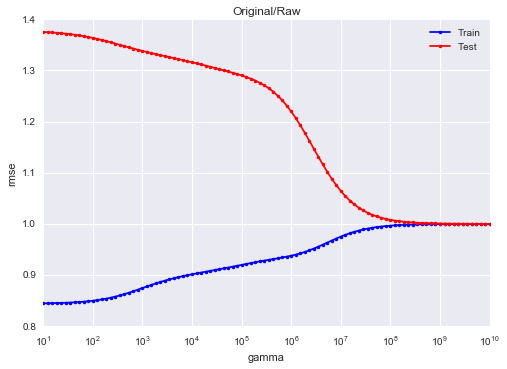

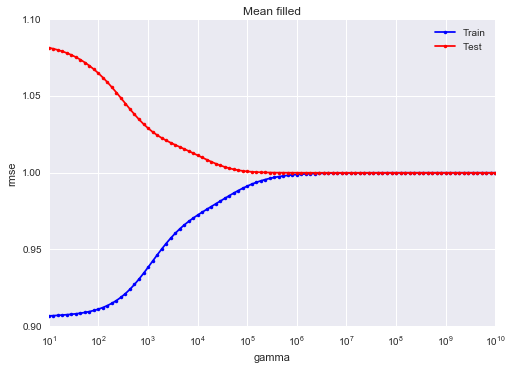

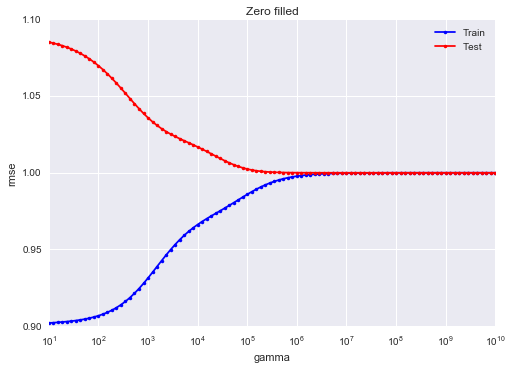

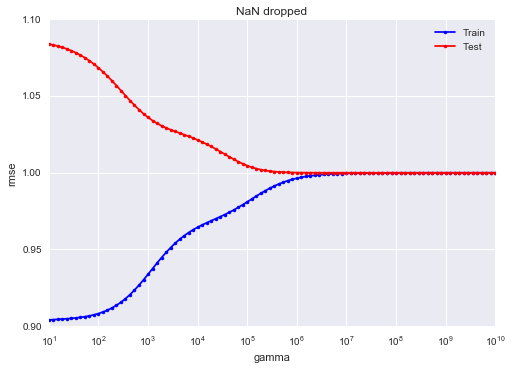

In [13]:
lambdas = np.logspace(1, 10, 100)
for i in range(len(train_datasets)):
    # Parameters
    train_dataset = train_datasets[i]
    test_dataset = test_datasets[i]
    dataset_name = datasets_names[i]
    figure_id = i
    
    ridge_regression_dataset_lamdas_test(y, y_test, train_dataset, test_dataset, lambdas, dataset_name, figure_id)

In [15]:
# Parameters
lamb = 1e-5

Ridge Regression for Original/Raw: execution time=0.490 seconds. Test RMSE Loss=1.3948134762978948, Train RMSE Loss=0.8242425861640709
Ridge Regression for Mean filled: execution time=0.082 seconds. Test RMSE Loss=1.1044720215411723, Train RMSE Loss=0.8830825306913244
Ridge Regression for Zero filled: execution time=0.084 seconds. Test RMSE Loss=1.1056919154162808, Train RMSE Loss=0.8815029961083303
Ridge Regression for NaN dropped: execution time=0.056 seconds. Test RMSE Loss=1.10339276212248, Train RMSE Loss=0.8844136447880689


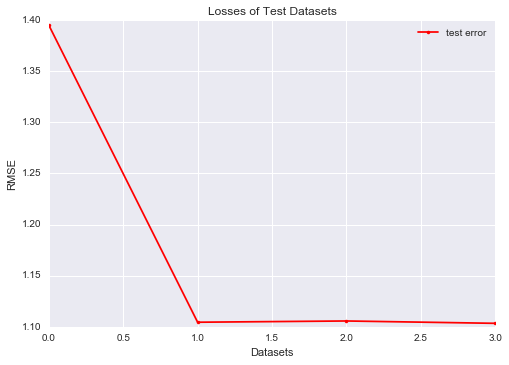

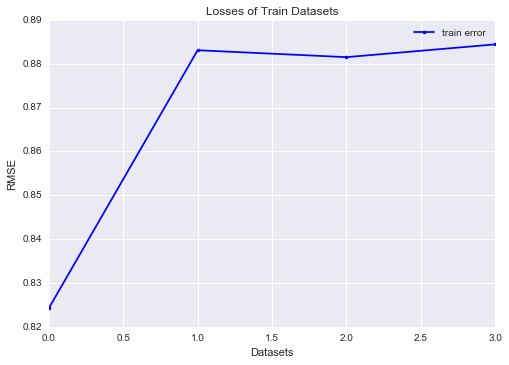

In [17]:
train_losses = []
test_losses = []
for i in range(len(train_datasets)):
    train_dataset = train_datasets[i]
    test_dataset = test_datasets[i]
    dataset_name = datasets_names[i]
    
    start_time = datetime.datetime.now()
    ridge_regression_loss, ridge_regression_gradient_w = ridge_regression(y, train_dataset, lamb)

    ridge_regression_loss = compute_rmse_loss(ridge_regression_loss)
    train_losses = np.append(train_losses, ridge_regression_loss)

    test_mse = compute_loss(y_test, test_dataset, ridge_regression_gradient_w)
    test_rmse = np.sqrt(2*test_mse)
    test_losses = np.append(test_losses, test_rmse)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    print("Ridge Regression for {dn}: execution time={t:.3f} seconds. Test RMSE Loss={l}, Train RMSE Loss={tl}".format(dn = dataset_name, t=exection_time, l=test_rmse, tl=ridge_regression_loss))

plt.figure(1)
plt.title("Losses of Test Datasets")
plt.plot(range(len(train_datasets)), test_losses, marker=".", color='r', label='test error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.figure(2)
plt.title("Losses of Train Datasets")
plt.plot(range(len(train_datasets)), train_losses, marker=".", color='b', label='train error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()

## Cross validation


In [ ]:
#TRY SOME CROSS VALIDATION HERE. Commented because I have only copied the code and did not calculate anything

# from plots import cross_validation_visualization

# subset_y = y
# subset_tx = new_all_zerofilled_tx


# # Define the parameters of the algorithm.
# seed = 1
# k_fold = 10
# lambdas = np.logspace(-16, 2, 1)

# rmse_tr = []
# rmse_te = []
# weights = np.empty((0,subset_tx.shape[1]), float)
# start_time = datetime.datetime.now()

# for lambd in np.nditer(lambdas):
#     w, loss_tr, loss_te = cross_validation(subset_y, subset_tx, k_fold, seed, lambd)
#     rmse_tr = np.append(rmse_tr, loss_tr)
#     rmse_te = np.append(rmse_te, loss_te)
#     weights = np.vstack((weights, w))
        
# end_time = datetime.datetime.now()
# exection_time = (end_time - start_time).total_seconds()

# print("Cross Validation: execution time={t:.3f} seconds.".format(t=exection_time))
# #cross_validation_visualization(lambdas, rmse_tr, rmse_te)